In [2]:
from yahoo_finance import Share
import numpy as np
import matplotlib.pyplot as plt
#import sklearn

def get_symbol():
    company_ticker = raw_input("enter the company ticker symbol: ")
    return company_ticker

def get_data():
    
    #date and time of the trade
    date = company.get_trade_datetime()

    #opening price
    opening_price = company.get_open()

    #Price right now (Yahoo finance is delayed by 15 mins????)
    current_price = company.get_price()

    #Day's high and low prices 
    day_high = company.get_days_high()
    day_low = company.get_days_low()
    
    #price changes from opening price
    price_change = company.get_change()
    
    
    #200 days moving average
    th_moving_avg = company.get_200day_moving_avg()
    #50 days moving average
    fifty_moving_avg = company.get_50day_moving_avg()
    
    #volume
    volume = company.get_volume()
    #compare this days volume with average volume
    average_daily_volume = company.get_avg_daily_volume()

    #PE ratio
    PE = company.get_price_earnings_ratio()

    #PEG ratio ---> pe ratio divided by 1-reinvestment (growth)
    PEG = company.get_price_earnings_growth_ratio()
    
    #book value
    book_value = company.get_book_value()

    print "trading date: ", date
    print "\ncurrent price: $", current_price
    print "opening price: $" , opening_price
    print "\nday high: $", day_high
    print "day low: $", day_low
    print "\nprint price change: $", price_change
    print "\n200 days moving average: $", th_moving_avg
    print "50 days moving average: $", fifty_moving_avg
    print "\nToday's volume: ", volume
    print "Average volume: ", average_daily_volume
    print "\nPrice to earning (PE) ratio : ", PE
    print "Price earning to growth (PEG) ratio: ", PEG
    print "\nbook value",  book_value
    '''
    if you refresh after market closes, you will get error
    #Refresh to get a new price
    # Note that after the market closes @ 4PM EST, the price will stay the same
    company.refresh()

    date = company.get_trade_datetime()
    current_price = company.get_price()
    price_change = company.get_change()

    print "\n########## After refreshing ####################"
    print "trading date: ", date
    print "current price: ", current_price
    print "opening price: $" , opening_price
    print "print price change: $", price_change
    ''';
    
    
ticker = get_symbol()
company = Share(ticker)
get_data()

enter the company ticker symbol: GOOG
trading date:  2015-09-11 20:00:00 UTC+0000

current price: $ 625.77
opening price: $ 619.75

day high: $ 625.78
day low: $ 617.42

print price change: $ +4.42

200 days moving average: $ 567.65
50 days moving average: $ 629.60

Today's volume:  1373545
Average volume:  2412690

Price to earning (PE) ratio :  29.48
Price earning to growth (PEG) ratio:  1.14

book value 163.07


In [3]:
begin = raw_input("Enter begin day in 'yyyy-mm-dd' format: ")
end = raw_input("Enter ending day in 'yyyy-mm-dd' format: ")

historical = company.get_historical(begin, end)
print len(historical), "Days of historical data"


Enter begin day in 'yyyy-mm-dd' format: 2015-01-01
Enter ending day in 'yyyy-mm-dd' format: 2015-09-01
168 Days of historical data


In [63]:
#to get all opening prices together

opening = [] #is a dynamic array (list) for python

for i in range(len(historical)):
    x = historical[i]['Open']
    opening.append(x)

#same for closing
closing = [] #is a dynamic array (list) for python

for i in range(len(historical)):
    x = historical[i]['Close']
    closing.append(x)

x_axis = np.arange(0+1, len(historical)+1)

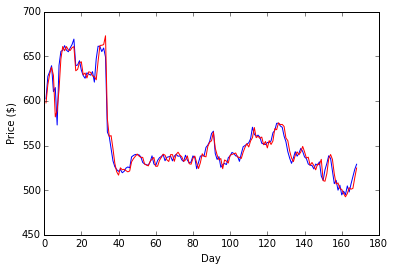

In [64]:
%matplotlib inline
plt.plot(x_axis,opening, 'b', x_axis, closing, 'r')
plt.xlabel('Day')
plt.ylabel('Price ($)')
#plt.figure(figsize=(20,10))
plt.show();

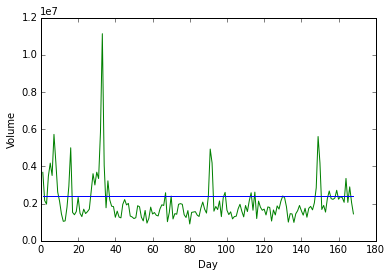

In [65]:
historical_volume = [] #is a dynamic array (list) for python
average_volume = []

for i in range(len(historical)):
    x = historical[i]['Volume']
    historical_volume.append(x)
    average_volume.append(company.get_avg_daily_volume())
    
    
plt.plot(x_axis,historical_volume, 'g', x_axis, average_volume, 'b')
plt.xlabel('Day')
plt.ylabel('Volume')
plt.show()

In [66]:
#support vector machine uses numpy.ndarray

data1 = np.asarray(opening)
data2 = np.asarray(closing)
data3 = np.asarray(historical_volume)




In [69]:
data = []
data.append(opening)
#add day's high

#days low
data.append(historical_volume)

data = opening
target = []
target.append(closing)
target = closing

In [70]:
print len(data)
print len(target)


168
168


In [71]:


#target_pre = np.asarray(closing)
#target = np.vstack(target_pre)

In [58]:
print len(opening)
print len(closing)

168
168


In [72]:
from sklearn import svm

In [73]:
clf = svm.SVC()

clf.fit(historical_volume, closing)

ValueError: X and y have incompatible shapes.
X has 1 samples, but y has 168.